# Preface: 

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA)

Data:

1. Cities Data for Sao Paulo and New York between May 2020- May 2021- Daily Total Confirmed Cases, Population, Cases per Million population
https://github.com/archinarula/Group-5-Project/blob/main/Clean_CSV/cities_dataframe.csv

2. Weather Data for Sao Paulo and New York - Daily Average Temp and Avergae Humidity
https://github.com/archinarula/Group-5-Project/blob/main/Clean_CSV/NYC_SaoPaulo_Weather.csv



# Basic Data Exploration

In [2]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
# Import the data

# Add the Resources path variables:
Cities = "Resources/cities_dataframe.csv"
Weather= "Resources/NYC_SaoPaulo_Weather.csv"

#Read CSVs and Create Dataframes:
CitiesCovid_df = pd.read_csv(Cities, parse_dates=['Reported_date'], encoding="ISO-8859-1",low_memory=False)
CitiesWeather_df = pd.read_csv(Weather, parse_dates=['Reported_date'], encoding="ISO-8859-1",low_memory=False)


In [4]:
print (CitiesCovid_df.shape)
CitiesCovid_df.head()

(722, 7)


,Reported_date,Country,City,total_confirmed_cases,Population,Census_year,cases_per_million
0,2020-05-20,Brasil,Sao Paulo,69859,12106920,2017,5770.0
1,2020-05-20,Estados Unidos,New York,354370,8398748,2018,42193.0
2,2020-05-21,Brasil,Sao Paulo,73739,12106920,2017,6091.0
3,2020-05-21,Estados Unidos,New York,356458,8398748,2018,42442.0
4,2020-05-22,Brasil,Sao Paulo,76871,12106920,2017,6349.0


In [5]:
CitiesCovid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Reported_date          722 non-null    datetime64[ns]
 1   Country                722 non-null    object        
 2   City                   722 non-null    object        
 3   total_confirmed_cases  722 non-null    int64         
 4   Population             722 non-null    int64         
 5   Census_year            722 non-null    int64         
 6   cases_per_million      722 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 39.6+ KB


In [6]:
CitiesCovid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_confirmed_cases,722.0,3.210982e+05,2.027071e+05,647.000,218795.25,294999.5,424917.00,880275.0
Population,722.0,1.032177e+07,1.924483e+06,8398748.000,8398748.00,10252834.0,12252023.00,12252023.0
Census_year,722.0,2.011917e+03,1.060065e+02,2.000,2017.00,2017.0,2018.00,2018.0
cases_per_million,722.0,3.281394e+04,2.320065e+04,52.834,20956.75,28749.0,42820.75,104810.0


In [7]:
print (CitiesWeather_df.shape)
CitiesWeather_df.head()


(1004, 14)


,Reported_date,city_name,lat,lon,temp_mean,humidity_mean,temp_min,temp_max,1_7_day_avg_temp,8_14_day_avg_temp,1_7_day_avg_humidity,8_14_day_avg_humidity,percent_change_in_temp,percent_change_in_humidity
0,2020-01-01,New York,40.712775,-74.005973,4.07,60.71,2.00,7.22,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,New York,40.712775,-74.005973,3.26,58.62,-3.33,10.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,New York,40.712775,-74.005973,7.42,78.12,4.44,9.44,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,New York,40.712775,-74.005973,8.63,94.88,6.67,11.11,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,New York,40.712775,-74.005973,4.92,59.67,2.22,10.56,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
CitiesWeather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Reported_date               1004 non-null   datetime64[ns]
 1   city_name                   1004 non-null   object        
 2   lat                         1004 non-null   float64       
 3   lon                         1004 non-null   float64       
 4   temp_mean                   1004 non-null   float64       
 5   humidity_mean               1004 non-null   float64       
 6   temp_min                    1004 non-null   float64       
 7   temp_max                    1004 non-null   float64       
 8   1_7_day_avg_temp            990 non-null    float64       
 9   8_14_day_avg_temp           976 non-null    float64       
 10  1_7_day_avg_humidity        990 non-null    float64       
 11  8_14_day_avg_humidity       976 non-null    float64     

In [9]:
CitiesWeather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,1004.0,8.581127,32.147661,-23.550520,-23.550520,8.581127,40.712775,40.712775
lon,1004.0,-60.319641,13.693153,-74.005973,-74.005973,-60.319641,-46.633309,-46.633309
temp_mean,1004.0,16.330757,7.981384,-6.020000,10.927500,18.695000,22.470000,30.420000
humidity_mean,1004.0,67.842908,12.965304,27.420000,60.060000,70.080000,76.832500,94.880000
temp_min,1004.0,11.102530,7.669441,-11.110000,6.000000,13.000000,17.000000,25.560000
temp_max,1004.0,22.698347,8.962991,-2.780000,17.220000,25.560000,29.122500,37.220000
1_7_day_avg_temp,990.0,16.338384,7.669755,-2.790000,10.520000,18.940000,22.505000,28.370000
8_14_day_avg_temp,976.0,16.348852,7.717806,-2.790000,10.425000,19.015000,22.552500,28.370000
1_7_day_avg_humidity,990.0,67.881707,8.101386,39.120000,63.650000,69.430000,73.327500,85.830000
8_14_day_avg_humidity,976.0,67.893023,8.093367,39.120000,63.650000,69.405000,73.322500,85.830000


# Basic Visualizations

Covid Cases data plotting for two cities

In [10]:
# Set x axis and tick locations for Covid cases in city plotting
x_axis = np.arange(len(CitiesCovid_df))
tick_locations = [value for value in x_axis]

In [11]:
# Create the NY City Covid DataFrame.
#NYCovid_df2= NYCovid_df[['Reported_date', 'total_confirmed_cases']]
NYCovid_df =CitiesCovid_df[CitiesCovid_df.City == 'New York'][['Reported_date', 'total_confirmed_cases']]
print(NYCovid_df.shape)
NYCovid_df.head()


(361, 2)


,Reported_date,total_confirmed_cases
1,2020-05-20,354370
3,2020-05-21,356458
5,2020-05-22,358154
7,2020-05-23,359926
9,2020-05-24,361515


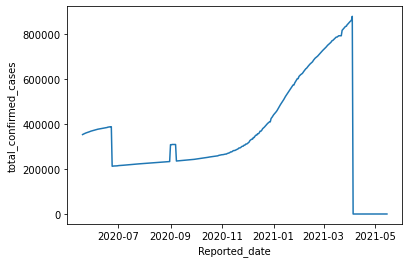

In [13]:
# Plotting using Seaborn
sns.lineplot(x = "Reported_date", y = "total_confirmed_cases", markers=True, dashes=False, data=NYCovid_df)
plt.show()  

<AxesSubplot:xlabel='total_confirmed_cases'>

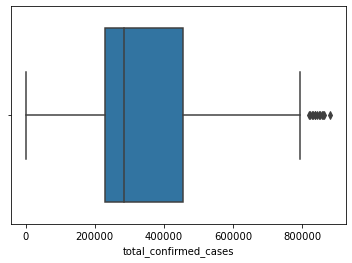

In [14]:
#Finding Outliers in NY Covid data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='total_confirmed_cases', data = NYCovid_df)

In [18]:
NYCovid_df[NYCovid_df['total_confirmed_cases']>800000]

,Reported_date,total_confirmed_cases
615,2021-03-23,818046
617,2021-03-24,822548
619,2021-03-25,826494
621,2021-03-26,830896
623,2021-03-27,835608
625,2021-03-28,836227
627,2021-03-29,843207
629,2021-03-30,846792
631,2021-03-31,851401
633,2021-04-01,855448


In [19]:
# Create the Sao Paulo City Covid DataFrame.
#SPCovid_df2= SPCovid_df[['Reported_date', 'total_confirmed_cases']]
SPCovid_df =CitiesCovid_df[CitiesCovid_df.City == 'Sao Paulo'][['Reported_date', 'total_confirmed_cases']]
print(SPCovid_df.shape)
SPCovid_df.head()


(361, 2)


,Reported_date,total_confirmed_cases
0,2020-05-20,69859
2,2020-05-21,73739
4,2020-05-22,76871
6,2020-05-23,76871
8,2020-05-24,82161


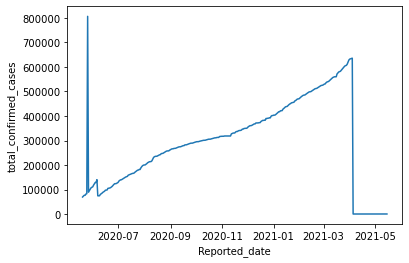

In [20]:
# Plotting using Seaborn
sns.lineplot(x = "Reported_date", y = "total_confirmed_cases", markers=True, dashes=False, data=SPCovid_df)
plt.show()       

<AxesSubplot:xlabel='total_confirmed_cases'>

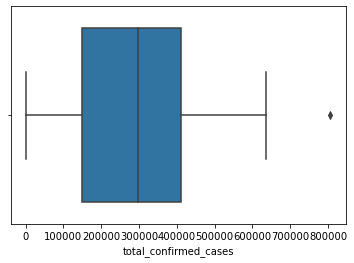

In [22]:
#Finding Outliers in Sao Paulo Covid data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='total_confirmed_cases', data = SPCovid_df)

In [23]:
SPCovid_df[SPCovid_df['total_confirmed_cases']>800000]

,Reported_date,total_confirmed_cases
12,2020-05-26,806017


Weather data plotting for two cities for the Avg Temp and Avg Humidity dailies

In [24]:
# Set x axis and tick locations for the weather data plotting
x_axis = np.arange(len(CitiesWeather_df))
tick_locations = [value for value in x_axis]

In [25]:
# Create the NY Weather Temp DataFrame.
NYWeatherTemp_df =CitiesWeather_df[CitiesWeather_df.city_name == 'New York'][['Reported_date', 'temp_mean']]
print(NYWeatherTemp_df.shape)
NYWeatherTemp_df.head()
  

(502, 2)


,Reported_date,temp_mean
0,2020-01-01,4.07
1,2020-01-02,3.26
2,2020-01-03,7.42
3,2020-01-04,8.63
4,2020-01-05,4.92


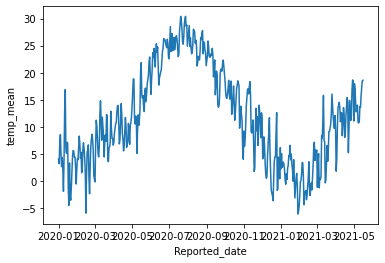

In [26]:
# Plotting using Seaborn-NY Temp
sns.lineplot(x = "Reported_date", y = "temp_mean", markers=True, dashes=False, data=NYWeatherTemp_df)
plt.show()

<AxesSubplot:xlabel='temp_mean'>

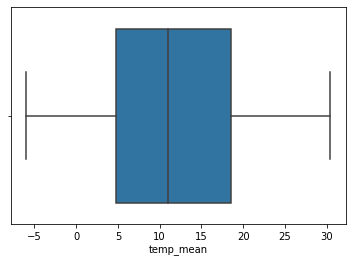

In [27]:
#Finding Outliers in NY Tempreture data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='temp_mean', data = NYWeatherTemp_df)

In [30]:
# Create the NY Weather Humidity DataFrame.
NYWeatherHumidity_df =CitiesWeather_df[CitiesWeather_df.city_name == 'New York'][['Reported_date', 'humidity_mean']]
print(NYWeatherHumidity_df.shape)
NYWeatherHumidity_df.head()


(502, 2)


,Reported_date,humidity_mean
0,2020-01-01,60.71
1,2020-01-02,58.62
2,2020-01-03,78.12
3,2020-01-04,94.88
4,2020-01-05,59.67


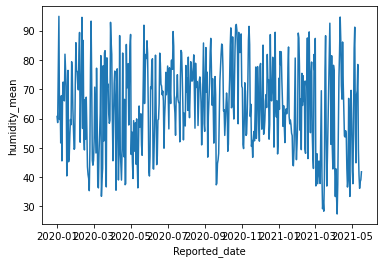

In [31]:
# Plotting using Seaborn-NY Humidity
sns.lineplot(x = "Reported_date", y = "humidity_mean", markers=True, dashes=False, data=NYWeatherHumidity_df)
plt.show()  

<AxesSubplot:xlabel='humidity_mean'>

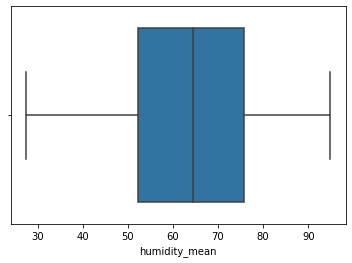

In [32]:
#Finding Outliers in NY Humidity data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='humidity_mean', data = NYWeatherHumidity_df)

In [33]:
# Create the SP Weather Temp DataFrame.
SPWeatherTemp_df =CitiesWeather_df[CitiesWeather_df.city_name == 'Sao Paulo'][['Reported_date', 'temp_mean']].reset_index()
print(SPWeatherTemp_df.shape)
SPWeatherTemp_df.head()


(502, 3)


,index,Reported_date,temp_mean
0,502,2020-01-01,25.67
1,503,2020-01-02,22.89
2,504,2020-01-03,21.02
3,505,2020-01-04,21.22
4,506,2020-01-05,21.13


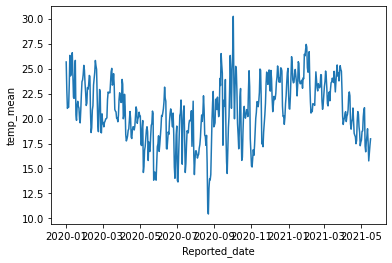

In [34]:
# Plotting using Seaborn-SP Temp
sns.lineplot(x = "Reported_date", y = "temp_mean", markers=True, dashes=False, data=SPWeatherTemp_df)
plt.show() 

<AxesSubplot:xlabel='temp_mean'>

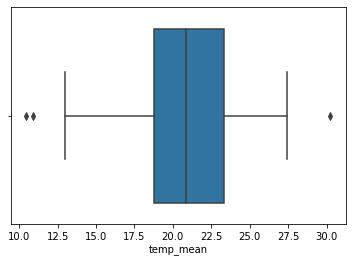

In [35]:
#Finding Outliers in Sao Paulo Temp data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='temp_mean', data = SPWeatherTemp_df)

In [37]:
SPWeatherTemp_df[SPWeatherTemp_df['temp_mean']>28]
SPWeatherTemp_df[SPWeatherTemp_df['temp_mean']<12.5]

,index,Reported_date,temp_mean
233,735,2020-08-21,10.92
234,736,2020-08-22,10.44


In [38]:
# Create the SP Weather Humidity DataFrame.
SPWeatherHumidity_df =CitiesWeather_df[CitiesWeather_df.city_name == 'Sao Paulo'][['Reported_date', 'humidity_mean']].reset_index()
print(SPWeatherHumidity_df.shape)
SPWeatherHumidity_df.head()

(502, 3)


,index,Reported_date,humidity_mean
0,502,2020-01-01,66.21
1,503,2020-01-02,81.40
2,504,2020-01-03,83.88
3,505,2020-01-04,79.76
4,506,2020-01-05,84.15


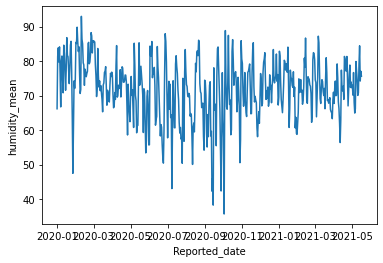

In [39]:
# Plotting using Seaborn-SP Humidity
sns.lineplot(x = "Reported_date", y = "humidity_mean", markers=True, dashes=False, data=SPWeatherHumidity_df)
plt.show() 

<AxesSubplot:xlabel='humidity_mean'>

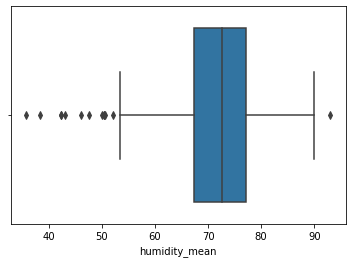

In [40]:
#Finding Outliers in Sao Paulo Humidity data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='humidity_mean', data = SPWeatherHumidity_df)

In [43]:
SPWeatherHumidity_df[SPWeatherHumidity_df['humidity_mean']<50]
SPWeatherHumidity_df[SPWeatherHumidity_df['humidity_mean']>90]

,index,Reported_date,humidity_mean
40,542,2020-02-10,93.0


# New Cases per Day

In [44]:
#I calculated the number of new cases recorded for each day by calculating the difference between current confirmed cases from the previous day (Confirmed.diff())

#Data Preprocessing
CitiesCovid_grouped = (CitiesCovid_df.groupby(['City','Reported_date']).total_confirmed_cases.sum()).reset_index()

#_____________New York New Cases Data______

NY_newcases = CitiesCovid_grouped.loc[CitiesCovid_grouped['City']=='New York']
NY_newcases.insert(3, 'New_cases', NY_newcases[['total_confirmed_cases']].diff().fillna(NY_newcases[['total_confirmed_cases']]), True)

# as May 20-2020 is the first record on dataset, starting Newcases from 21-May 2021 to be able to have a difference from previous date
NY_newcases = NY_newcases.iloc[1:361].reset_index() 
print(NY_newcases.shape)
NY_newcases.head()





(360, 5)


,index,City,Reported_date,total_confirmed_cases,New_cases
0,1,New York,2020-05-21,356458,2088.0
1,2,New York,2020-05-22,358154,1696.0
2,3,New York,2020-05-23,359926,1772.0
3,4,New York,2020-05-24,361515,1589.0
4,5,New York,2020-05-25,362764,1249.0


In [45]:
#_____________Sao Paulo New Cases Data______

SP_newcases = CitiesCovid_grouped.loc[CitiesCovid_grouped['City']=='Sao Paulo']
SP_newcases.insert(3, 'New_cases', SP_newcases[['total_confirmed_cases']].diff().fillna(SP_newcases[['total_confirmed_cases']]), True)

# as May 20-2020 is the first record on dataset, starting Newcases from 21-May 2021 to be able to have a difference from previous date
SP_newcases = SP_newcases.iloc[1:361].reset_index() 
print(SP_newcases.shape)
SP_newcases.head()

(360, 5)


,index,City,Reported_date,total_confirmed_cases,New_cases
0,362,Sao Paulo,2020-05-21,73739,3880.0
1,363,Sao Paulo,2020-05-22,76871,3132.0
2,364,Sao Paulo,2020-05-23,76871,0.0
3,365,Sao Paulo,2020-05-24,82161,5290.0
4,366,Sao Paulo,2020-05-25,83625,1464.0


# Merge Dataset with City New Cases with Weather of that city

In [65]:
# concat doesnt work here
#NY_Full_df = pd.concat([NY_newcases[['Reported_date']],NY_newcases[['New_cases']],NYWeatherTemp_df[['temp_mean']],NYWeatherHumidity_df[['humidity_mean']]], axis =1)


In [66]:
# Create FULL NY DF with LEFT JOIN in 2 steps joining the New cases + Temp+ humidity table for data starting May 21-2020
NY_merge2_df = pd.merge(NY_newcases, NYWeatherTemp_df, how="left", on=["Reported_date"])
NY_merge2_df.info()
NY_merge2_df.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  360 non-null    int64         
 1   City                   360 non-null    object        
 2   Reported_date          360 non-null    datetime64[ns]
 3   total_confirmed_cases  360 non-null    int64         
 4   New_cases              360 non-null    float64       
 5   temp_mean              360 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 19.7+ KB


,index,City,Reported_date,total_confirmed_cases,New_cases,temp_mean
0,1,New York,2020-05-21,356458,2088.0,12.87
1,2,New York,2020-05-22,358154,1696.0,16.64
2,3,New York,2020-05-23,359926,1772.0,17.19
3,4,New York,2020-05-24,361515,1589.0,14.67
4,5,New York,2020-05-25,362764,1249.0,16.24


In [67]:
NY_merge_full_df = pd.merge(NY_merge2_df, NYWeatherHumidity_df, how="left", on=["Reported_date"])
NY_merge_full_df.info()
NY_merge_full_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  360 non-null    int64         
 1   City                   360 non-null    object        
 2   Reported_date          360 non-null    datetime64[ns]
 3   total_confirmed_cases  360 non-null    int64         
 4   New_cases              360 non-null    float64       
 5   temp_mean              360 non-null    float64       
 6   humidity_mean          360 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 22.5+ KB


,index,City,Reported_date,total_confirmed_cases,New_cases,temp_mean,humidity_mean
0,1,New York,2020-05-21,356458,2088.0,12.87,60.62
1,2,New York,2020-05-22,358154,1696.0,16.64,74.44
2,3,New York,2020-05-23,359926,1772.0,17.19,91.86
3,4,New York,2020-05-24,361515,1589.0,14.67,65.12
4,5,New York,2020-05-25,362764,1249.0,16.24,75.71


In [68]:
# Delete extraneous columns
del NY_merge_full_df["index"]
del NY_merge_full_df["City"]
del NY_merge_full_df["total_confirmed_cases"]
NY_merge_full_df.head()

,Reported_date,New_cases,temp_mean,humidity_mean
0,2020-05-21,2088.0,12.87,60.62
1,2020-05-22,1696.0,16.64,74.44
2,2020-05-23,1772.0,17.19,91.86
3,2020-05-24,1589.0,14.67,65.12
4,2020-05-25,1249.0,16.24,75.71


In [69]:
# Create FULL SPDF with LEFT JOIN in 2 steps joining the New cases + Temp+ humidity table for data starting May 21-2020
SP_merge2_df = pd.merge(SP_newcases, SPWeatherTemp_df, how="left", on=["Reported_date"])
SP_merge2_df.info()
SP_merge2_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index_x                360 non-null    int64         
 1   City                   360 non-null    object        
 2   Reported_date          360 non-null    datetime64[ns]
 3   total_confirmed_cases  360 non-null    int64         
 4   New_cases              360 non-null    float64       
 5   index_y                360 non-null    int64         
 6   temp_mean              360 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 22.5+ KB


,index_x,City,Reported_date,total_confirmed_cases,New_cases,index_y,temp_mean
0,362,Sao Paulo,2020-05-21,73739,3880.0,643,19.50
1,363,Sao Paulo,2020-05-22,76871,3132.0,644,20.75
2,364,Sao Paulo,2020-05-23,76871,0.0,645,20.50
3,365,Sao Paulo,2020-05-24,82161,5290.0,646,13.83
4,366,Sao Paulo,2020-05-25,83625,1464.0,647,14.62


In [70]:
SP_merge_full_df = pd.merge(SP_merge2_df, SPWeatherHumidity_df, how="left", on=["Reported_date"])
SP_merge_full_df.info()
SP_merge_full_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index_x                360 non-null    int64         
 1   City                   360 non-null    object        
 2   Reported_date          360 non-null    datetime64[ns]
 3   total_confirmed_cases  360 non-null    int64         
 4   New_cases              360 non-null    float64       
 5   index_y                360 non-null    int64         
 6   temp_mean              360 non-null    float64       
 7   index                  360 non-null    int64         
 8   humidity_mean          360 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 28.1+ KB


,index_x,City,Reported_date,total_confirmed_cases,New_cases,index_y,temp_mean,index,humidity_mean
0,362,Sao Paulo,2020-05-21,73739,3880.0,643,19.50,643,70.17
1,363,Sao Paulo,2020-05-22,76871,3132.0,644,20.75,644,59.33
2,364,Sao Paulo,2020-05-23,76871,0.0,645,20.50,645,72.00
3,365,Sao Paulo,2020-05-24,82161,5290.0,646,13.83,646,70.96
4,366,Sao Paulo,2020-05-25,83625,1464.0,647,14.62,647,61.79


In [71]:
# Delete extraneous columns
del SP_merge_full_df["index_x"]
del SP_merge_full_df["index_y"]
del SP_merge_full_df["index"]
del SP_merge_full_df["City"]
del SP_merge_full_df["total_confirmed_cases"]
SP_merge_full_df.head()

,Reported_date,New_cases,temp_mean,humidity_mean
0,2020-05-21,3880.0,19.50,70.17
1,2020-05-22,3132.0,20.75,59.33
2,2020-05-23,0.0,20.50,72.00
3,2020-05-24,5290.0,13.83,70.96
4,2020-05-25,1464.0,14.62,61.79


# CORRELATION

In [72]:
import warnings
warnings.filterwarnings("ignore")

NY Data correlation

<AxesSubplot:>

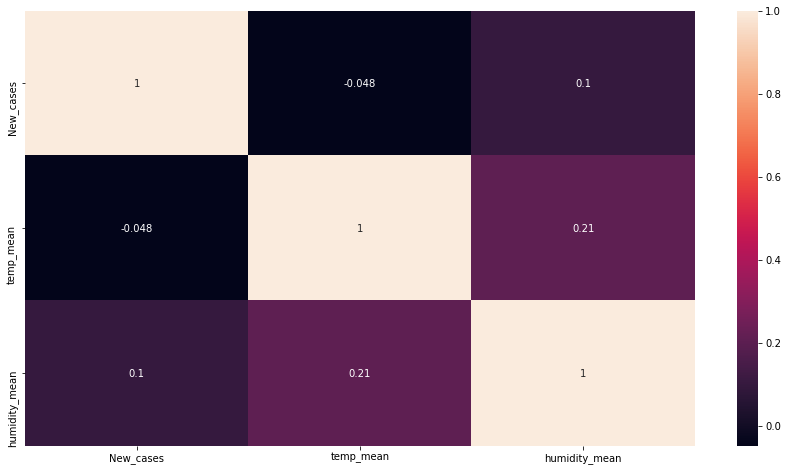

In [73]:
# Let us get the correlation in the data

plt.figure(figsize=(15,8))
sns.heatmap(NY_merge_full_df.corr(), annot = True)

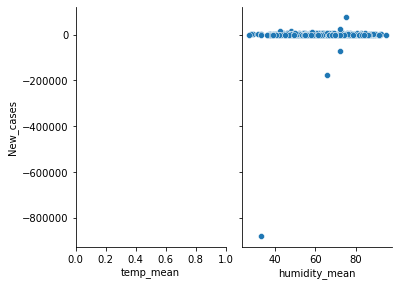

In [74]:
sns.pairplot(NY_merge_full_df, x_vars=['temp_mean','humidity_mean'], y_vars='New_cases',size=4, aspect=0.7, kind='scatter')

In [75]:
# To find the relationship between the number of new cases reported and the weather condition variables(Temperature, Humidity), I used the Spearman correlation test because I'm not sure if the relationship is fully linear between the variables. The result shows a negative relationship between new cases and Temperature, Humidity.
NY_merge_full_df.corr(method='spearman').style.background_gradient('viridis')

,New_cases,temp_mean,humidity_mean
New_cases,1.000000,-0.542834,-0.046125
temp_mean,-0.542834,1.000000,0.207057
humidity_mean,-0.046125,0.207057,1.000000


Sau Paolo Data correlation

<AxesSubplot:>

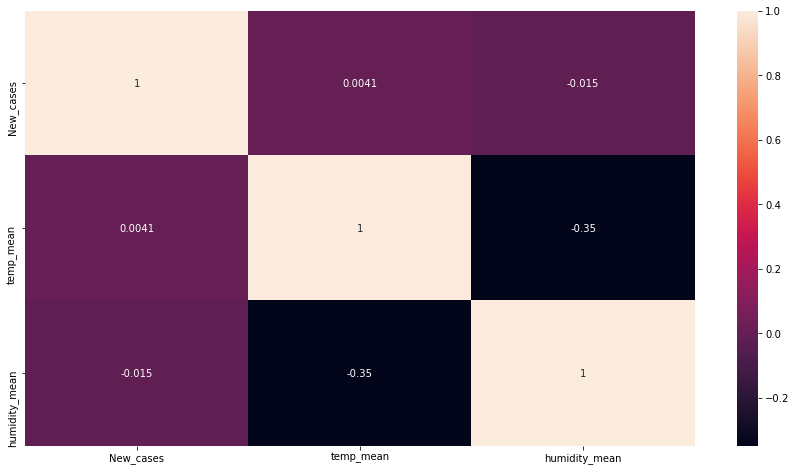

In [76]:
# Let us get the correlation in the data

plt.figure(figsize=(15,8))
sns.heatmap(SP_merge_full_df.corr(), annot = True)

In [78]:
# To find the relationship between the number of new cases reported and the weather condition variables(Temperature, Humidity), I used the Spearman correlation test because I'm not sure if the relationship is fully linear between the variables. The result shows a negative relationship between new cases and Temperature, Humidity.
SP_merge_full_df.corr(method='spearman').style.background_gradient('viridis')

,New_cases,temp_mean,humidity_mean
New_cases,1.000000,0.097980,-0.084620
temp_mean,0.097980,1.000000,-0.315554
humidity_mean,-0.084620,-0.315554,1.000000
